In [1]:
%load_ext autoreload
%autoreload 2

import typing as ty
from functools import partial

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display, HTML

import iccas as ic
import util

# Matplotlib settings and utilities
%matplotlib inline
plt.style.use('seaborn')
mpl.rcParams.update({
    'axes.titlesize': 16,
    'axes.titley': 1.03,
    'axes.labelsize': 14
})

ic.set_locale('it')

# Load original data, take only cases and deaths counts and fix monotonicity as explained above
data = ic.fix_monotonicity(ic.only_counts(ic.get()))

# Day-by-day interpolated data. 
# Note: ic.resample behaves better than DataFrame.resample() + interpolate() for my use case. See the docstring for more info.
resampled = ic.resample(data, freq='1D', hour=18, method='pchip')

## Correzione e pre-elaborazione dei dati

I dati originali estratti dai bollettini PDF dell'ISS sono a tratti inconsistenti. Il numero di casi/decessi totali dall'inizio della pandemia dovrebbe infatti crescere nel tempo ma in alcuni tratti le serie temporali decrescono per poi tornare nuovamente a crescere. Questo problema è in realtà presente in maniera rilevante solo nei dati sui decessi ed è quasi del tutto assente nei dati sui casi. 

Visto che il più delle volte non si tratta di singoli punti anomali, presumo che le decrescite a valori più bassi siano dovute a rettifiche dei dati. Dunque, nel correggere i dati, ho assunto che i valori della serie che raggiungono temporaneamente livelli più alti di valori successivi siano invalidi e li ho sostituiti con valori interpolati (metodo PCHIP).

Per maggiori dettagli si veda `Correzione_dati.ipynb`.

<center><img src='./esempio_correzione.png'></center>

## Tabella: numero medio di casi mese per mese

In [2]:
for normalize in [False, True]:
    display(
        util.averages_by_period_table(
            data, 'cases', freq='M', normalize=normalize
        ).set_caption('')
    )

Età,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,>=90
Mese,,,,,,,,,,
2020-04,30,60,221,281,452,574,377,417,708,397
2020-05,14,29,79,93,131,166,92,89,150,98
2020-06,8,13,29,31,38,40,30,26,23,10
2020-07,13,16,35,37,36,29,18,15,13,5
2020-08,26,96,198,103,79,79,39,24,18,7
2020-09,87,141,276,231,235,243,140,84,51,16
2020-10,493,1293,1543,1431,1680,1799,1023,654,488,166
2020-11,1201,2695,3862,3996,5266,5900,3537,2468,1906,664


Età,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,>=90
Mese,,,,,,,,,,
2020-04,0.9%,1.7%,6.3%,8.0%,12.9%,16.3%,10.7%,11.9%,20.1%,11.3%
2020-05,1.5%,3.1%,8.4%,9.9%,13.9%,17.6%,9.8%,9.4%,16.0%,10.4%
2020-06,3.0%,5.1%,11.6%,12.5%,15.5%,16.1%,12.1%,10.3%,9.4%,4.2%
2020-07,5.8%,7.5%,16.3%,17.1%,16.4%,13.3%,8.3%,7.1%,6.0%,2.2%
2020-08,3.9%,14.3%,29.6%,15.3%,11.8%,11.8%,5.9%,3.7%,2.7%,1.1%
2020-09,5.8%,9.4%,18.4%,15.4%,15.6%,16.2%,9.3%,5.6%,3.4%,1.1%
2020-10,4.7%,12.2%,14.6%,13.5%,15.9%,17.0%,9.7%,6.2%,4.6%,1.6%
2020-11,3.8%,8.6%,12.3%,12.7%,16.7%,18.7%,11.2%,7.8%,6.1%,2.1%


## Tabella: numero medio di decessi mese per mese

In [3]:
for normalize in [False, True]:
    display(
        util.averages_by_period_table(
            data, 'deaths', freq='M', normalize=normalize
        ).set_caption('')
    )

Età,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,>=90
Mese,,,,,,,,,,
2020-04,0,0,0,1,4,18,51,124,206,96
2020-05,0,0,0,0,2,6,16,39,84,53
2020-06,0,0,0,0,1,2,4,9,22,17
2020-07,0,0,0,0,0,0,1,3,7,5
2020-08,0,0,0,0,0,2,4,9,15,8
2020-09,0,0,0,0,0,0,2,3,7,4
2020-10,0,0,0,0,0,3,7,15,33,17
2020-11,0,0,0,1,5,17,50,130,222,104


Età,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,>=90
Mese,,,,,,,,,,
2020-04,0.0%,0.0%,0.0%,0.2%,0.9%,3.5%,10.2%,24.7%,41.2%,19.2%
2020-05,0.0%,0.0%,0.1%,0.2%,0.8%,3.0%,8.1%,19.4%,42.1%,26.3%
2020-06,0.0%,0.0%,0.0%,0.2%,1.2%,3.1%,7.5%,16.8%,40.0%,31.3%
2020-07,0.0%,0.0%,0.2%,0.0%,1.6%,2.9%,6.2%,18.5%,40.2%,30.4%
2020-08,0.0%,0.0%,0.0%,0.2%,0.7%,4.4%,9.6%,24.6%,40.5%,19.9%
2020-09,0.0%,0.0%,0.0%,0.4%,1.2%,3.0%,9.0%,16.9%,44.0%,25.5%
2020-10,0.0%,0.0%,0.0%,0.3%,0.6%,3.4%,9.0%,20.3%,43.5%,22.8%
2020-11,0.0%,0.0%,0.1%,0.2%,0.9%,3.2%,9.5%,24.6%,41.8%,19.6%


## Numero medio di casi per settimana

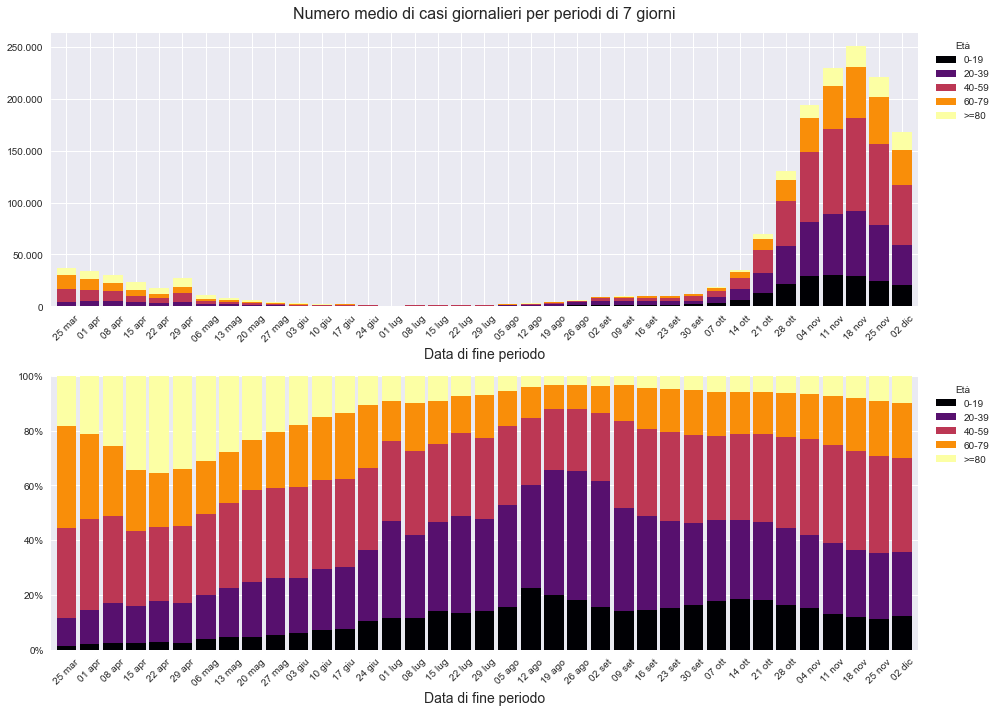

In [4]:
def average_by_period_bar_chart(data, variable, freq=7, age_group_size=20):
    fig, ax = plt.subplots(2, 1, figsize=(14, 10))
    for i, normalize in enumerate([False, True]):
        ic.charts.bar.average_by_period_bar_chart(
            data, variable, freq=freq, age_group_size=age_group_size, normalize=normalize, ax=ax[i])

    ax[1].set_title('')
    plt.tight_layout()
    plt.tight_layout()

    
average_by_period_bar_chart(data, 'cases', freq=7)

## Numero medio di decessi settimana per settimana

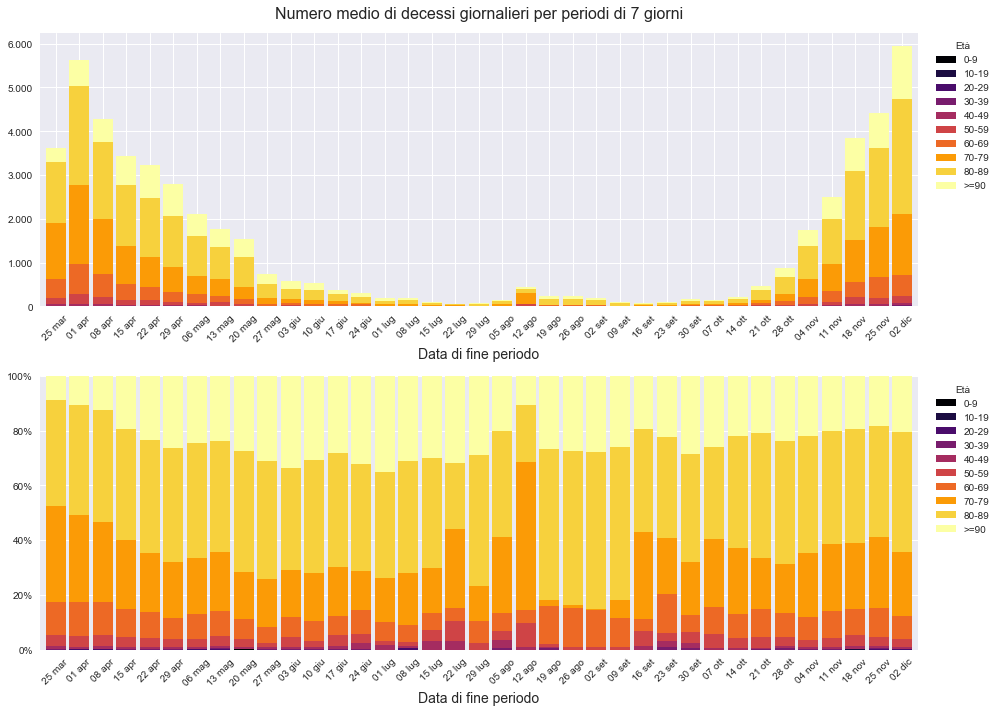

In [5]:
average_by_period_bar_chart(data, 'deaths', freq=7, age_group_size=10)

## Media mobile a 7 giorni dei nuovi casi

Versione continua del grafico precedente.

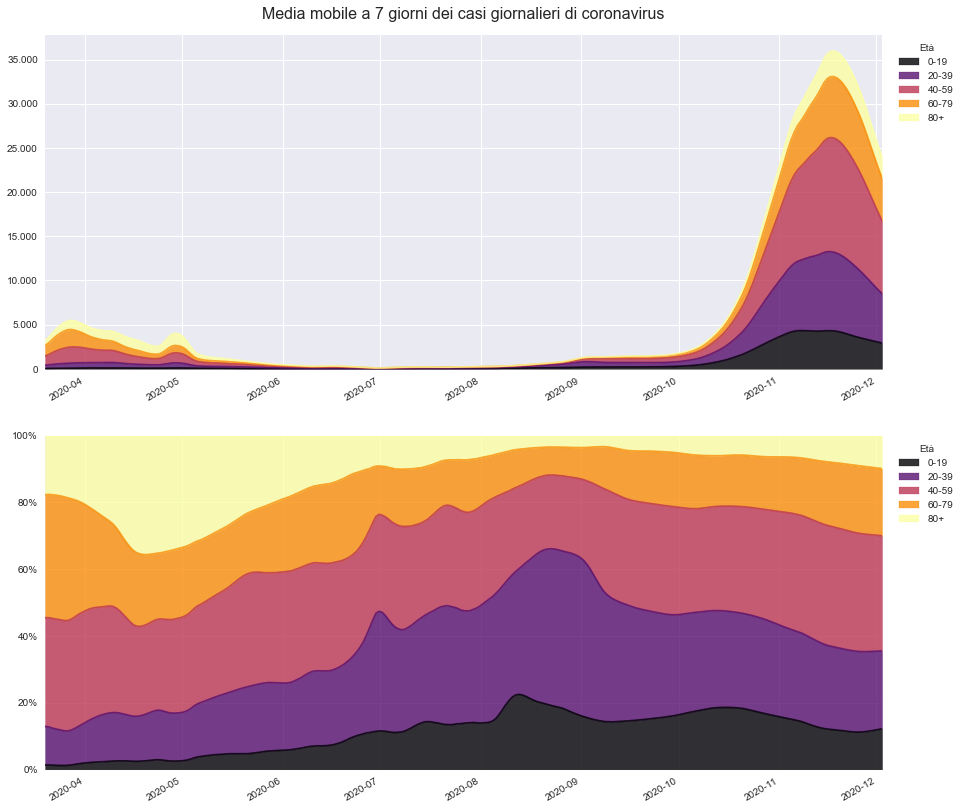

In [6]:
ic.charts.double_area_chart_of_running_averages(resampled, 'cases', window=7);

## Media mobile a 7 giorni dei nuovi decessi

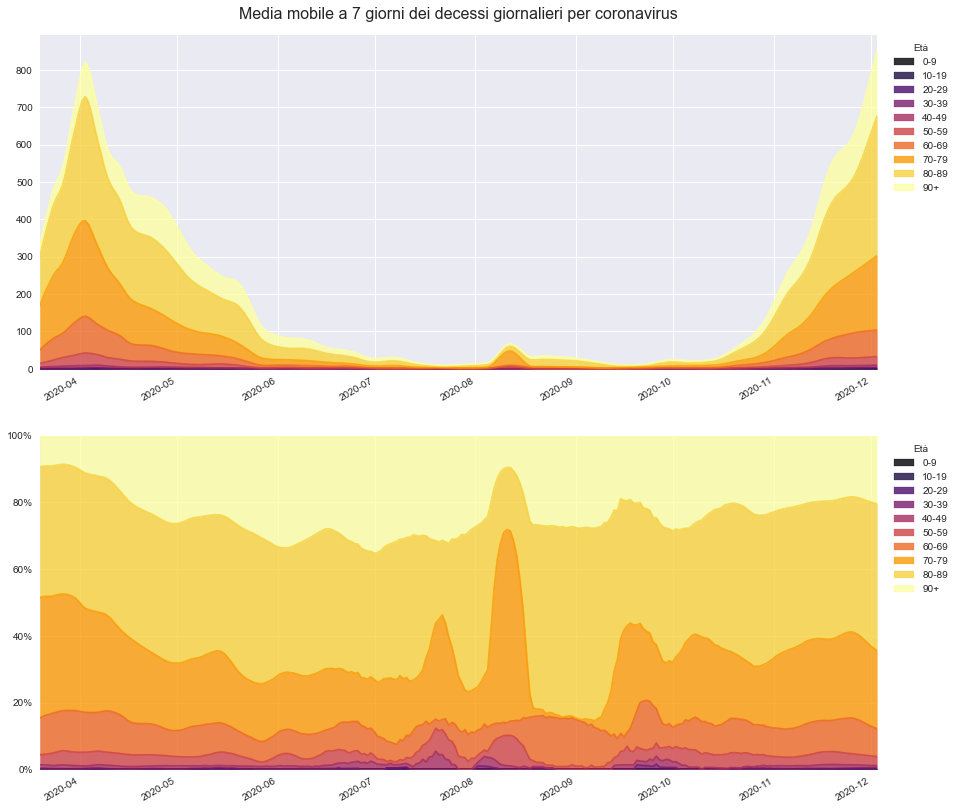

In [7]:
ic.charts.double_area_chart_of_running_averages(resampled, 'deaths', window=7, age_group_size=10);